# Проектная работа

**Цель проекта:** определить окупаемость рекламной компании приложения и определить причины неэффективности привлечения пользователей. 

План работы:
1. Подключить необходимые библиотеки для работы
2. Изучить общую информацию о наборах данных:
    * загрузить файлы
    * посмотреть количество данных, их тип, пропущенные значения, дубликаты, название столбцов
    * оценить распределение данных и сделать предварительные выводы о корректности данных
    * сделать вывод
3. Провести предварительную обработку данных:
    * переименовать столбцы в соответствии с правилами
    * обработать пропуски
    * изменить тип данных
    * обработать дубликаты
    * сделать вывод
4. Задать функции для расчета бизнес метрик. 
5. Провести исследовательский анализ данных:
    * Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
    * Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
    * Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    * Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
    * Сделать вывод.
6. Маркетинг
    * Посчитать общую сумму расходов на маркетинг.
    * Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
    * Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализировать динамику изменения расходов во времени по месяцам по каждому источнику.
    * Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.
    * Сделать вывод.
7. Оценить окупаемость рекламы:
    * Проанализировать купаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
    * Проверить конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Построить и изучите графики конверсии и удержания.
    * Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    * Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
     * Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    * Ответить на такие вопросы:
        - Окупается ли реклама, направленная на привлечение пользователей в целом?
        - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
        - Чем могут быть вызваны проблемы окупаемости?
    * Написать общий вывод, описать возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.
8. Напишите выводы. Выделить причины неэффективности привлечения пользователей. Сформулировать рекомендации для отдела маркетинга.

Предоставлено 3 набора данных с информацией о посещениях сайта, с информацией о заказах, информацией о расходах на рекламу.

In [1]:
#подключение библиотек
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#импорт наборов данных

try:
    visits, orders, costs = (
                                pd.read_csv('data1.csv'),
                                pd.read_csv('data2csv'),
                                pd.read_csv('data3.sv'),
                            )
    
except:
    visits, orders, costs = (
                                pd.read_csv('https://data1.csv'),
                                pd.read_csv('https://data2.csv'),
                                pd.read_csv('https://data3csv'),    
                            )
    

In [3]:
#просмотр общей информации
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
#проверка на явные дубликаты:
visits.duplicated().sum()

0

В наборе данных visits 309901 строк, 6 столбцов. Пропусков нет. 1 столбец содержит целочисленные данные, остальные - object. Названия всех столбцов нужно привести к змеиному регистру, столбцы Session Start и Session End нужно привести к типу данных дата. Явных дубликатов нет.

In [5]:
#корректировка названий столбцов
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')

In [6]:
#изменение типов данных 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверка на явные дубликаты

In [8]:
visits['user_id'].nunique()

150008

Уникальных значений user_id меньше, чем строк в наборе данных. Такое может быть, ведь пользователь может не один раз зайти в приложение. Проверим, что вместе с датой подключения уникальных значений будет столько же, скольки и строк в датафрейме.

In [9]:
visits[['user_id', 'session_start']].shape[0] == visits.shape[0]

True

Так и есть. Посмотрим уникальные значения других колонок.

In [10]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [11]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [12]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Неявных дубликатов также в датасете нет.

In [13]:
#просмотр общей информации
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
#проверка на явные дубликаты:
orders.duplicated().sum()

0

В наборе данных orders 40212 строк, 3 столбца. Пропусков нет. 1 столбец содержит данные типа int, 1 - object, 1 - float. Названия всех столбцов нужно привести к змеиному регистру, столбец Event Dt нужно привести к типу данных дата. Явных дубликатов нет.

In [15]:
#корректировка названий столбцов
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')

In [16]:
#изменение типов данных 
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [18]:
orders['user_id'].nunique()

8881

Уникальных значений user_id меньше, чем строк в наборе данных. Такое может быть, ведь пользователь может не один раз купить что-то в приложении. Проверим, что вместе с датой подключения уникальных значений будет столько же, скольки и строк в датафрейме.

In [19]:
orders[['user_id', 'event_dt']].shape[0] == orders.shape[0]

True

In [20]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

Большая часть сумм заказов (75%) 4.99, скорее всего, это какая-то стандартная сумма, первая подписка, покупка обновления. Остальные 25% это, скорее всего, повторные покупки.

In [21]:
#просмотр общей информации
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [22]:
#проверка на явные дубликаты:
costs.duplicated().sum()

0

В наборе данных orders 1800 строк, 3 столбца. Пропусков нет. 2 столбца имеют тип данных object, 1 - float. Название столбца Channel привести к змеиному регистру, столбец dt нужно привести к типу данных дата. Явных дубликатов нет.

In [23]:
#корректировка названий столбцов
costs.columns = costs.columns.str.lower()

In [24]:
#изменение типов данных 
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [25]:
costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [26]:
costs['dt'].nunique()

180

In [27]:
costs[['dt', 'costs']].shape[0]

1800

In [28]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Выполнена предобработка данных трех датасетов.

В наборе данных visits 309901 строк, 6 столбцов. В наборе данных orders 40212 строк, 3 столбца. В наборе данных orders 1800 строк, 3 столбца. Во всех наборах данных нет пропущенных значений и явных и неявных дубликатов. Названия столбцов приведены к змеиному регистру, тип данных столбцов с датой приведены к соотвествующему типу данных. 

**Функции для вычисления значений метрик**

In [29]:
#для создания профилей пользователей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [30]:
#для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [31]:
#для подсчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [32]:
#для подсчёта LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Функции для построения графиков**

In [33]:
#для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [34]:
#для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [35]:
#для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [36]:
#для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [37]:
#профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [38]:
#минимальная и максимальная даты привлечения пользователей
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print(f'Минимальная дата привлечения пользователей: {min_date}')
print(f'Максимальная дата привлечения пользователей: {max_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Получена таблица данных profiles, в которой собрана информация о пользователях: уникальный номер, дата первого подключения, канал, из которого пришел пользователь, устройство, с помощью которого подключается пользователь, его регион, совершал ли пользователь покупки в приложении и какова стоимость рекламы, потраченной на привлечение этого пользователя.
Определены минимальная и максимальные даты привлечения пользователей.

In [39]:
#функция для группировки по столбцу и подсчету пользователей
def col_payer(column):
    df = profiles.groupby(column).agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
    df['payer_abs'] = profiles.groupby(column).agg({'payer': 'sum'})
    df['payer_abs_fraction'] = df['payer_abs'] / profiles['payer'].sum()
    
    return df

,user_id,payer,payer_abs,payer_abs_fraction
region,,,,
United States,100002,0.069019,6902,0.777165
Germany,14981,0.041119,616,0.069362
UK,17575,0.039829,700,0.078820
France,17450,0.037994,663,0.074654


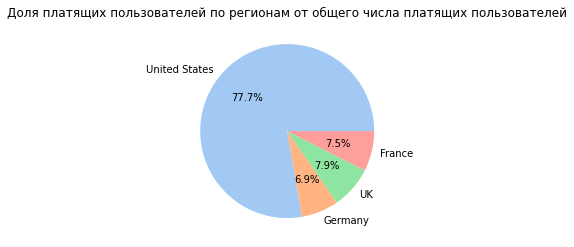

In [40]:
#подсчет пользователей по странам и доля плятящих 
region_payer = col_payer('region')
#графическое отображение доля платящих пользователей
plt.pie(region_payer['payer_abs_fraction'], labels = list(region_payer.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%') 
plt.title('Доля платящих пользователей по регионам от общего числа платящих пользователей')
region_payer

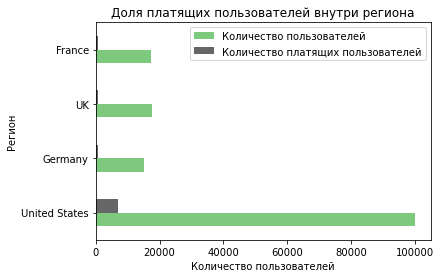

In [41]:
#столбчатая диаграмма, отобращающая доля платящих пользователей от общего числа пользователей
ax = region_payer[['user_id', 'payer_abs']].plot(kind='barh', colormap='Accent')
ax.set_ylabel('Регион')
ax.set_xlabel('Количество пользователей')
ax.set_title('Доля платящих пользователей внутри региона')
plt.legend(['Количество пользователей', 'Количество платящих пользователей'])
plt.show()

Больше всего пользователей приложения, а также и доля платящих из United States. Несмотря на то, что пользователей из Германии меньше всего по доле платящих они находятся на втором месте. Относительно общего количества всех платящих пользователей, 77.7% из США, на 3 оставшихся региона приходится примерно одинаковое количество.

,user_id,payer,payer_abs,payer_abs_fraction
device,,,,
Mac,30042,0.063644,1912,0.215291
iPhone,54479,0.062079,3382,0.380813
Android,35032,0.058518,2050,0.230830
PC,30455,0.050468,1537,0.173066


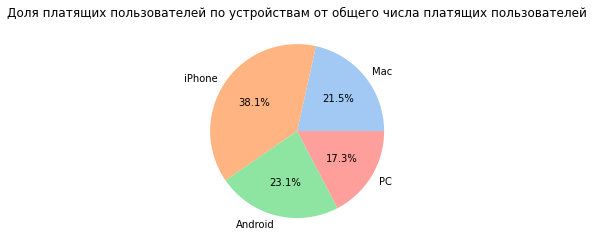

In [42]:
#таблица, подсчитывающая количество пользователей и доля платящих в зависимости от устройства
device_payer = col_payer('device')
#графическое отображение доля платящих пользователей по устройствам
plt.pie(device_payer['payer_abs_fraction'], labels = list(device_payer.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title('Доля платящих пользователей по устройствам от общего числа платящих пользователей')
device_payer

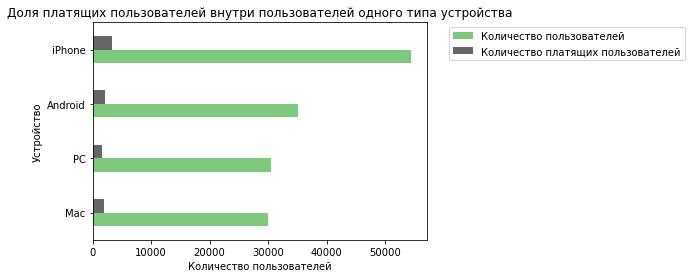

In [43]:
#столбчатая диаграмма, отобращающая доля платящих пользователей от общего числа пользователей в зависимости от типа устройства
ax = device_payer[['user_id', 'payer_abs']].sort_values(by='user_id').plot(kind='barh', colormap='Accent')
ax.set_ylabel('Устройство')
ax.set_xlabel('Количество пользователей')
ax.set_title('Доля платящих пользователей внутри пользователей одного типа устройства')
plt.legend(['Количество пользователей', 'Количество платящих пользователей'], bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

Большинство пользователей предпочитают пользоваться iPhone, однако, наибольшая доля платящих среди пользователей Mac, хотя  количество пользователей этого устройства наименьшее. Наименьшая доля платящих среди пользователей PC. Относительно общего количества всех платящих пользователей, 38.1 пользователей iPhone, меньше всего - 17.3% приходится на PC.

In [44]:
#таблица, подсчитывающая количество пользователей и доля платящих в зависимости от канала привлечения пользователей
channel_payer = col_payer('channel')
channel_payer

,user_id,payer,payer_abs,payer_abs_fraction
channel,,,,
FaceBoom,29144,0.122049,3557,0.400518
AdNonSense,3880,0.113402,440,0.049544
lambdaMediaAds,2149,0.104700,225,0.025335
TipTop,19561,0.096007,1878,0.211463
RocketSuperAds,4448,0.079137,352,0.039635
WahooNetBanner,8553,0.052964,453,0.051008
YRabbit,4312,0.038265,165,0.018579
MediaTornado,4364,0.035747,156,0.017566
LeapBob,8553,0.030633,262,0.029501


In [45]:
#отображение топ 5 каналов, остальные объединены в группу - Другие
channel_5 = channel_payer.sort_values(by='payer_abs_fraction', ascending=False).head(5)
channel_5.loc["Другие каналы", 'payer_abs_fraction'] = 1-channel_5['payer_abs_fraction'].sum()
channel_5 = channel_5.sort_values(by='payer_abs_fraction')

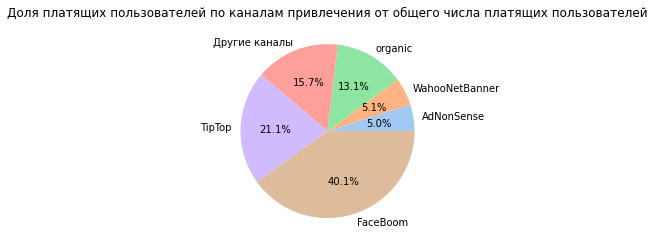

In [46]:
#графическое отображение доля платящих пользователей по устройствам
plt.pie(channel_5['payer_abs_fraction'], labels = list(channel_5.index), colors=sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title('Доля платящих пользователей по каналам привлечения от общего числа платящих пользователей');

Большинство пользователей пришло напрямую в приложение, однако, доля платящих среди них наименьшая - 2%. Наибольшая доля платящих клиентов среди пользователей, пришедших через канал FaceBoom - более 12%.  Относительно общего количества всех платящих пользователей, 40.1 пользователей FaceBoom, меньше всего - MediaTornado.

**Вывод**

Больше всего пользователей приложения, а также и доля платящих внутри региона из США - почти 7%. Несмотря на то, что пользователей из Германии меньше всего по доле платящих внутри региона они находятся на втором месте. Если смотреть доли относоительного общего числа платящих пользователей здесь также лидируют США, причем со значительным отрывом, 77.7% от общего числа платящих - это пользователи США, пользователи остальных регионов распределились примерно одинаково.

Большинство пользователей предпочитают пользоваться iPhone, однако, наибольшая доля платящих среди пользователей Mac, хотя  количество пользователей этого устройства наименьшее. Наименьшая доля платящих среди пользователей PC. Относительно общего количества всех платящих пользователей, 38.1 пользователей iPhone, меньше всего - 17.3% приходится на PC. Это соответствует и информаци о регионе платящих пользователей, так как в США лидируют iPhone и Mac.

Большинство пользователей пришло напрямую в приложение, однако, доля платящих среди них наименьшая - 2%. Но для бесплатных в плане привлечения пользователей, это даже очень хорошо. Наибольшая доля платящих клиентов среди пользователей, пришедших через канал FaceBoom - более 12%. Относительно общего количества всех платящих пользователей, 40.1 пользователей FaceBoom, меньше всего - MediaTornado.


In [47]:
#общая сумма расходов на маркетинг
total_costs = costs['costs'].sum()
round(total_costs, 2)

105497.3

Общая сумма расходов на маркетинг составила 105497.

In [48]:
#распределение трат по рекламным источникам
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Наибольшую сумму потратили на рекламу через канал TipTop, на втором месте - FaceBoom, наименьшие расходы на рекламу через канал YRabbit. 

In [49]:
#создадим столбцы с месяцем и неделей
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

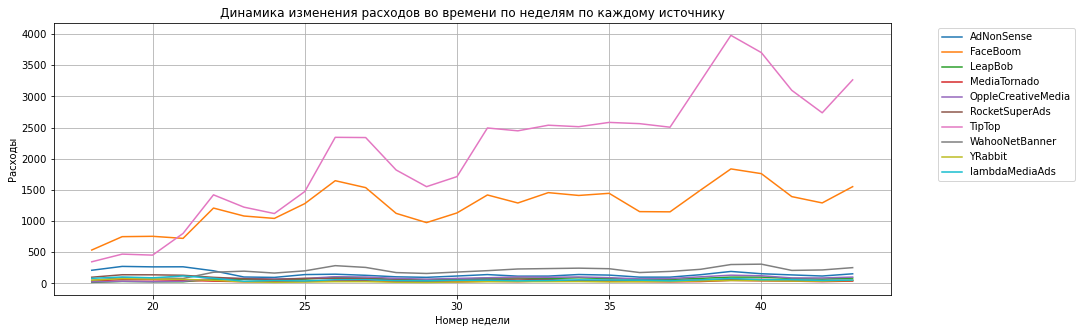

In [50]:
#визуализация динамики изменения расходов во времени по неделям по каждому источнику
ax = costs_week_channel = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
costs_week_channel.plot(figsize=(15, 5), grid=True)
plt.title('Динамика изменения расходов во времени по неделям по каждому источнику')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

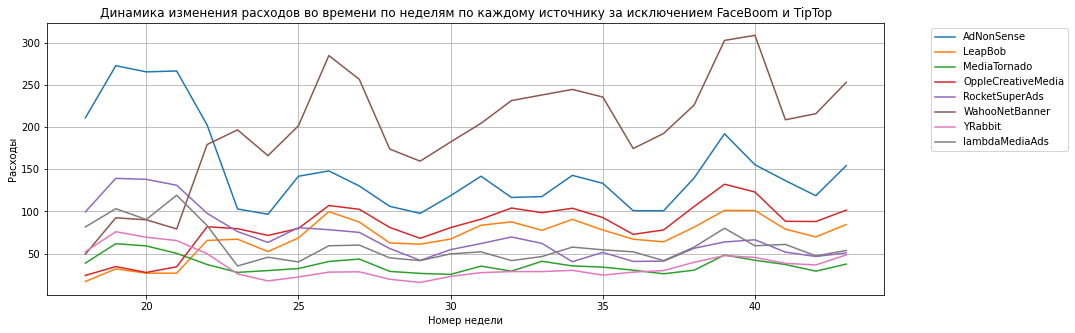

In [51]:
#визуализация динамики изменения расходов во времени по неделям по каждому источнику за исключением топовых FaceBoom и TipTop
ax = costs.loc[(costs['channel'] != 'FaceBoom') & (costs['channel'] != 'TipTop')].pivot_table(
    index='week', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True)
ax.set_title('Динамика изменения расходов во времени по неделям по каждому источнику за исключением FaceBoom и TipTop')
ax.set_xlabel('Номер недели')
ax.set_ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

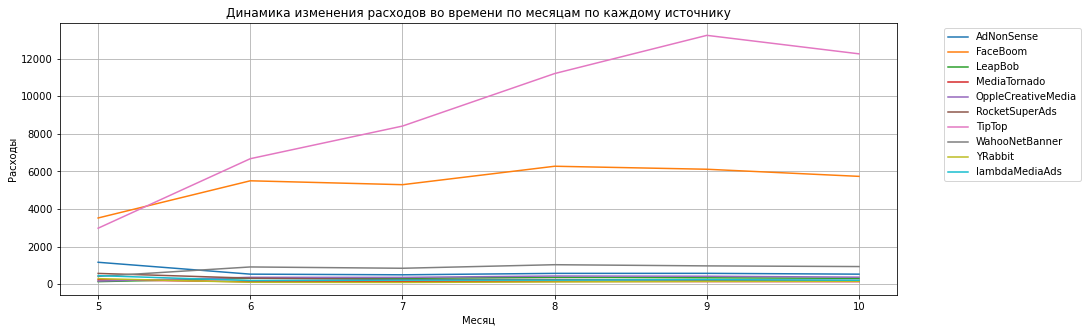

In [52]:
#визуализация динамики изменения расходов во времени по месяцам по каждому источнику
costs_month_channel = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_month_channel.plot(figsize=(15, 5), grid=True)
plt.title('Динамика изменения расходов во времени по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

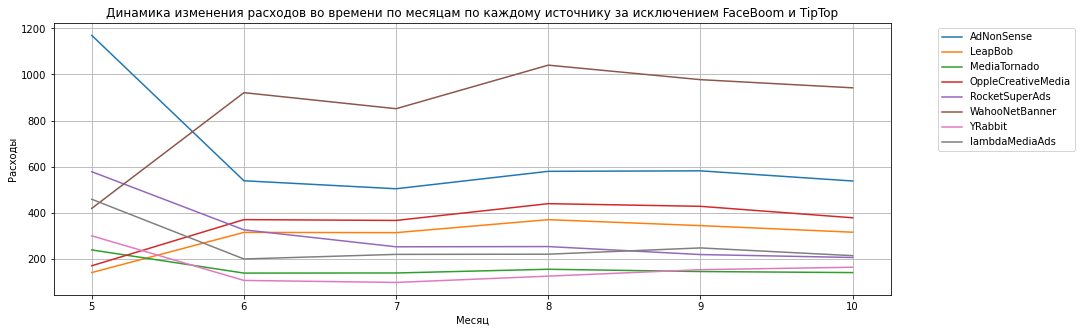

In [53]:
#визуализация динамики изменения расходов во времени по месяцам по каждому источнику за исключением FaceBoom и TipTop
costs.loc[(costs['channel'] != 'FaceBoom') & (costs['channel'] != 'TipTop')].pivot_table(
    index='month', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True)
plt.title('Динамика изменения расходов во времени по месяцам по каждому источнику за исключением FaceBoom и TipTop')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

Недельные расходы на источники привлечения на каналы TipTop и FaceBoom значительно выше расходов на остальные каналы, с переменной динамикой роста, относительно первой рассматриваемой недели расходы увеличись с 400 и 500 до 1500 и 3200 соответственно. Расходы другие каналы варьируют в пределах 300 на всем рассматриваемом периоде. Начиная с 23 недели, наименьшие расходы у YRabbit и MEdiaTornado.

Динамика расходов во времени по месяцам похожая: лидерами являются TipTop и FaceBoom, расходы на которых начались от 3000 в мае и в октябре они достигили 12000 и 6000 соответственно.Расходы на другие каналы варьируют в пределах 1200 на всем рассматриваемом периоде. Наименьшие расходы у YRabbit и MEdiaTornado в октябре не превышают 200.

In [54]:
#траты в среднем на привлечение одного пользователя (CAC) из каждого источника
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Учитывая значительные расходы на рекламу через каналы TipTop и FaceBoom, неудивительно видеть у этих каналов и самые высокие суммы для привлечения одного пользователя, 2.79 и 1.11 соответственно. Без учета бесплатных пользователей, наименьшие показатели YRabbit, MediaTornado, LeapBob.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [55]:
#выбираем дату наблюдения и горизонт
horizon_days = 14
observation_date = datetime(2019, 11, 1).date()

Исключим из рассмотрения органических пользователей, поскольку изучаем окупаемость рекламы.

In [56]:
profiles_without_org = profiles.query('channel != "organic"')
profiles_without_org['channel'].value_counts()

FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64

In [57]:
#получаем данные для графиков
# сырые данные, таблица LTV, таблица динамики LTV, таблица ROI, таблица динамики ROI

result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                                                profiles_without_org,
                                                                                orders,
                                                                                observation_date,
                                                                                horizon_days,
                                                                                dimensions=[],
                                                                                ignore_horizon=False,
                                                                                )

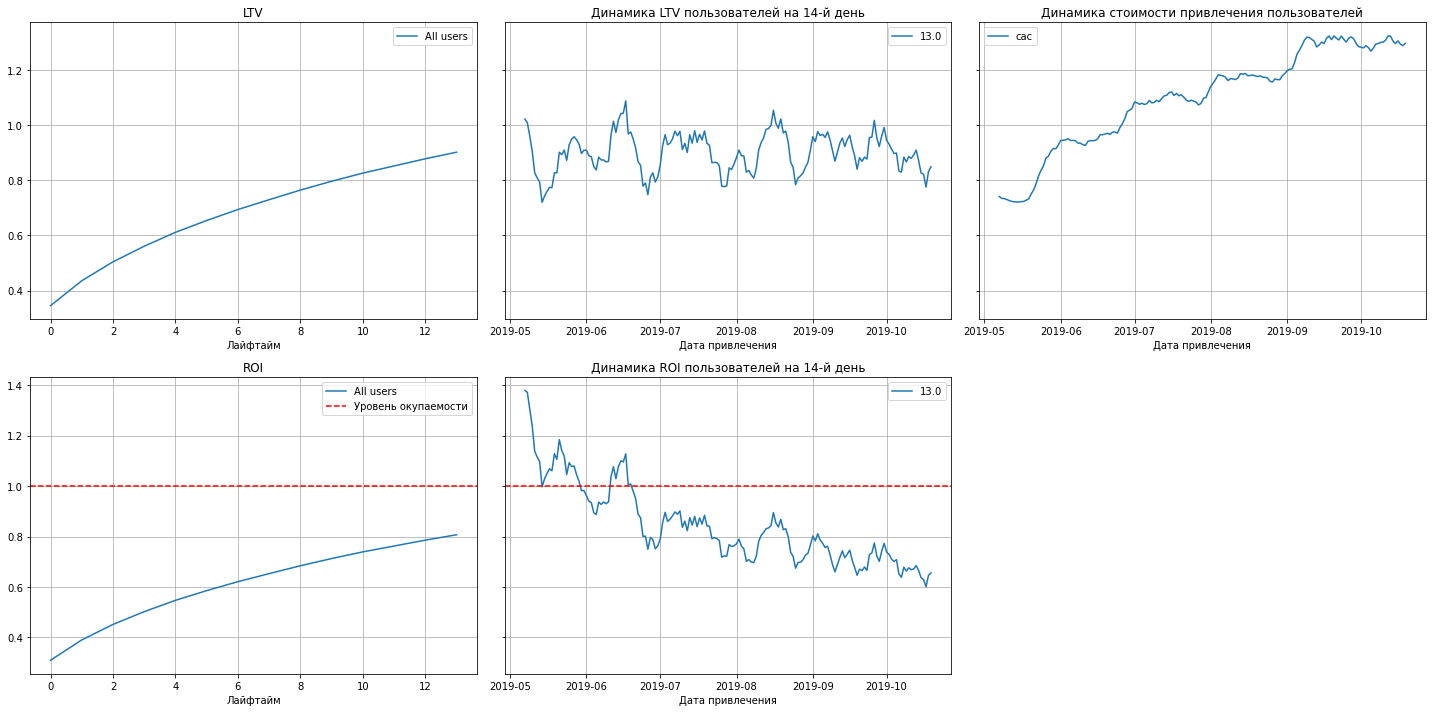

In [58]:
#строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Рекламная компания не окупается: ROI так и не пересекает уровень окупаемости. В динамике стоимость привлечения пользователей только растет, но в динамике ROI только падает: как к концу рассматриваемого периода, так и по месяцам.

In [59]:
#сырые данные, таблица конверсии, таблица динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles_without_org,
                                                                orders,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=[],
                                                                ignore_horizon=False,
                                                                )

In [60]:
#сырые данные, таблица удержания, таблица динамики удержания
retention_raw, retention, retention_history = get_retention(
                                                            profiles_without_org,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=[],
                                                            ignore_horizon=False,
                                                            )

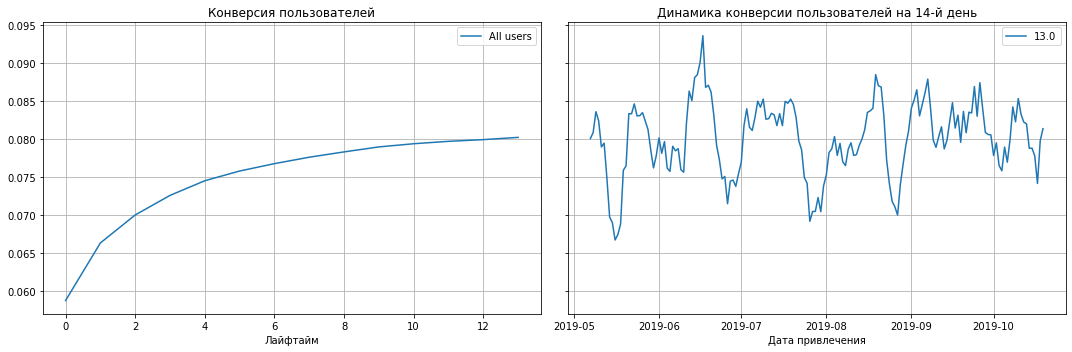

In [61]:
#графики конверсии и динамики конверсии
plot_conversion(conversion, conversion_history, horizon_days, window=7)

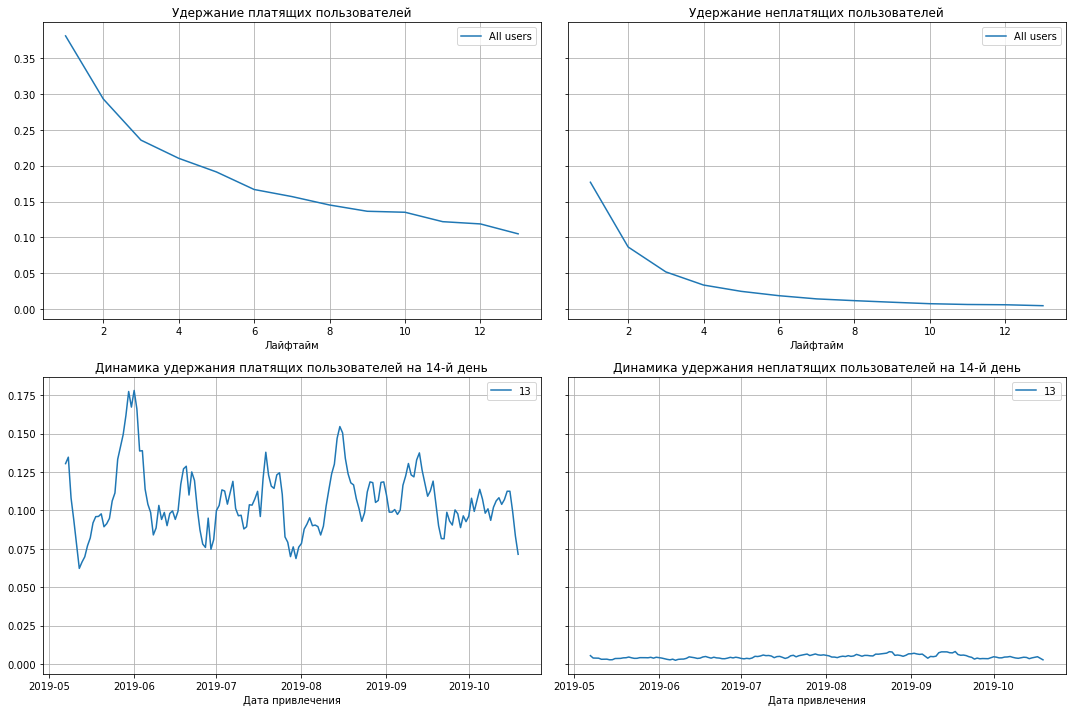

In [62]:
#графики удержания и динамики удержания
plot_retention(retention, retention_history, horizon_days, window=7)

Конверсия всех пользователей положительная, в динамике наблюдаются низкие показатели конверсии в мае.Удержание клиентов к концу второй недели ожидаемо снижается, при этом удержание платящих пользователей значительно выше неплатящих, у которых к концу второй недели удержание около 0. Динамика удержания платящих пользователей немного отличается в июне, динамика неплатящих - практически одинаковая по сезонам.

In [63]:
#получаем данные для графиков с разбивкой по устройствам
# сырые данные, таблица LTV, таблица динамики LTV, таблица ROI, таблица динамики ROI

device_raw, ltv_device, ltv_history_device, roi_device, roi_history_device = get_ltv(
                                                                                profiles_without_org,
                                                                                orders,
                                                                                observation_date,
                                                                                horizon_days,
                                                                                dimensions=['device'],
                                                                                ignore_horizon=False,
                                                                                )

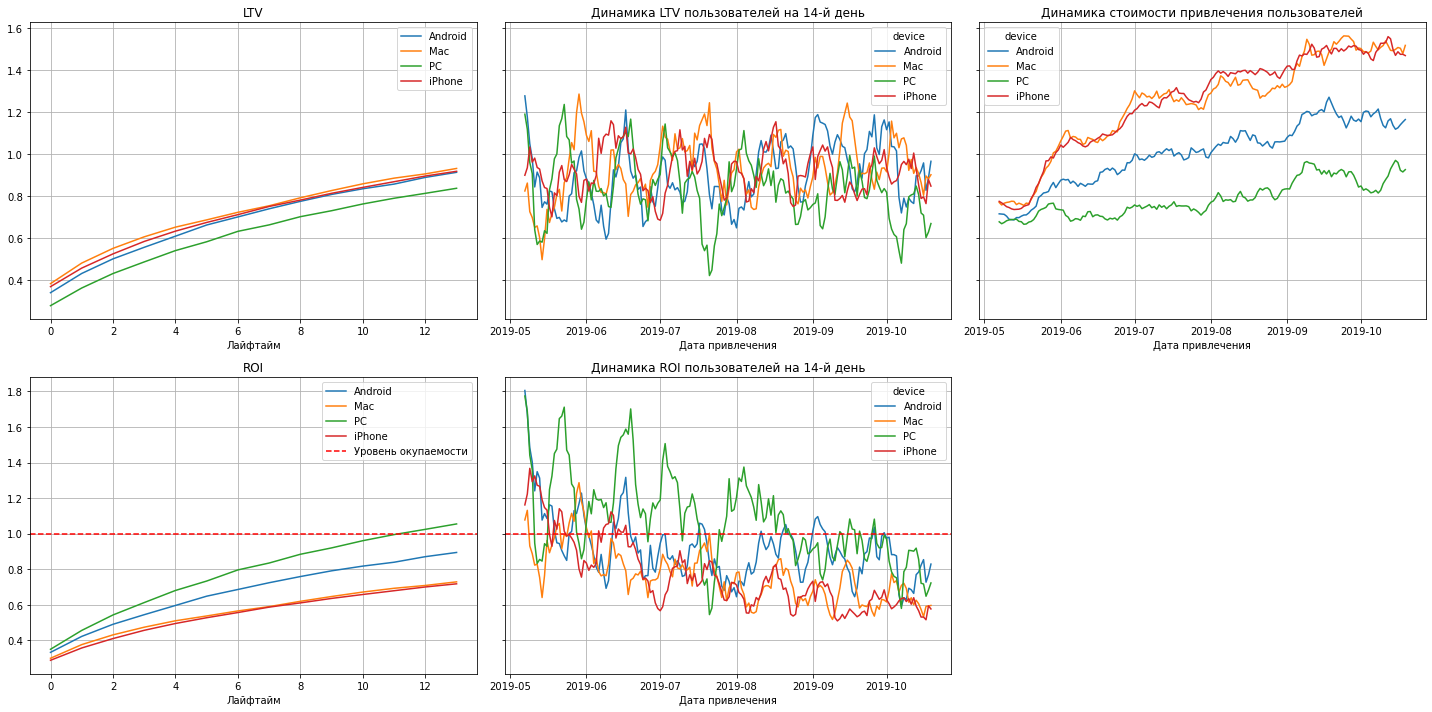

In [64]:
#строим графики
plot_ltv_roi(ltv_device, ltv_history_device, roi_device, roi_history_device, horizon_days, window=7)

Среди устройств пользователей самый низкий показатель пожизненной ценности у пользователей PC, пользователи Android, Mac и iPhone обладают примерно одинаковой пожизненной ценностью. Несмотря на самую высокую стоимость привлечения пользователей с устройствами на iPhone и Mac, а также рост расходов на рекламу среди этих пользователей, реклама не окупается - ROI этих пользователей так и не достигает уровень окупаемости, как и пользователей на Android, в отличие от пользователей на  PC. Динамика ROI несмотря на свою волнообразность в основном отрицательная. Хотя стоит отметить, что для пользователей на PC до середины августа она была в основном окупаемой. 

In [65]:
#получаем данные для графиков с разбивкой по странам
# сырые данные, таблица LTV, таблица динамики LTV, таблица ROI, таблица динамики ROI

region_raw, ltv_region, ltv_history_region, roi_region, roi_history_region = get_ltv(
                                                                                profiles_without_org,
                                                                                orders,
                                                                                observation_date,
                                                                                horizon_days,
                                                                                dimensions=['region'],
                                                                                ignore_horizon=False,
                                                                                )

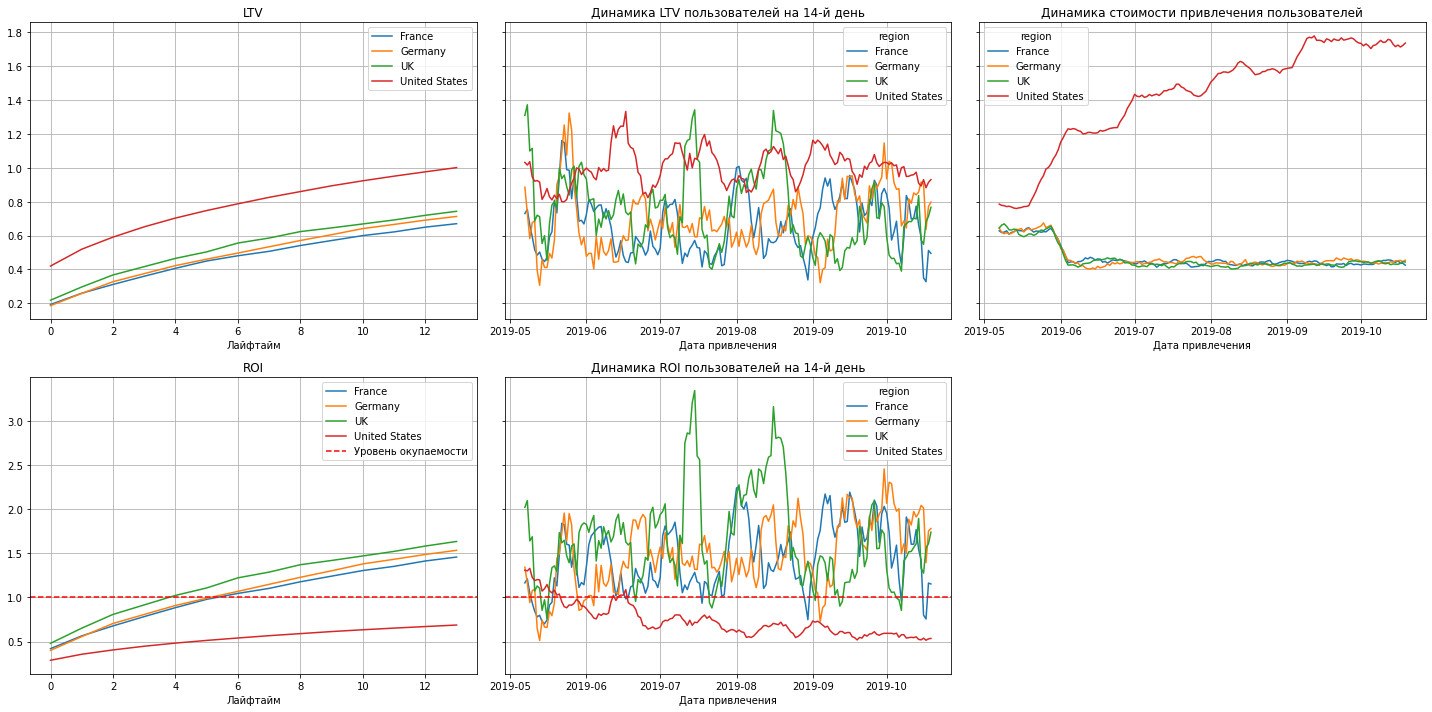

In [66]:
#строим графики
plot_ltv_roi(ltv_region, ltv_history_region, roi_region, roi_history_region, horizon_days, window=7)

Во всех регионах показатель LTV подвержен сезонности, но стабилен. Явным лидером являются США. Несмотря на самую высокую стоимость привлечения пользователей в США (в том числе и в динамике), реклама именно в этом регионе не окупается. В остальных регионах реклама стабильно окупается и практически не подвержена сезонности. Реклама в США окупилась только в мае.

Показательно, что снижение динамики стоимости привлечения пользователей в Европе, оправдано, именно в Европе реклама окупилась

In [67]:
#получаем данные для графиков с разбивкой по странам
# сырые данные, таблица LTV, таблица динамики LTV, таблица ROI, таблица динамики ROI

channel_raw, ltv_channel, ltv_history_channel, roi_channel, roi_history_channel = get_ltv(
                                                                                profiles_without_org,
                                                                                orders,
                                                                                observation_date,
                                                                                horizon_days,
                                                                                dimensions=['channel'],
                                                                                ignore_horizon=False,
                                                                                )

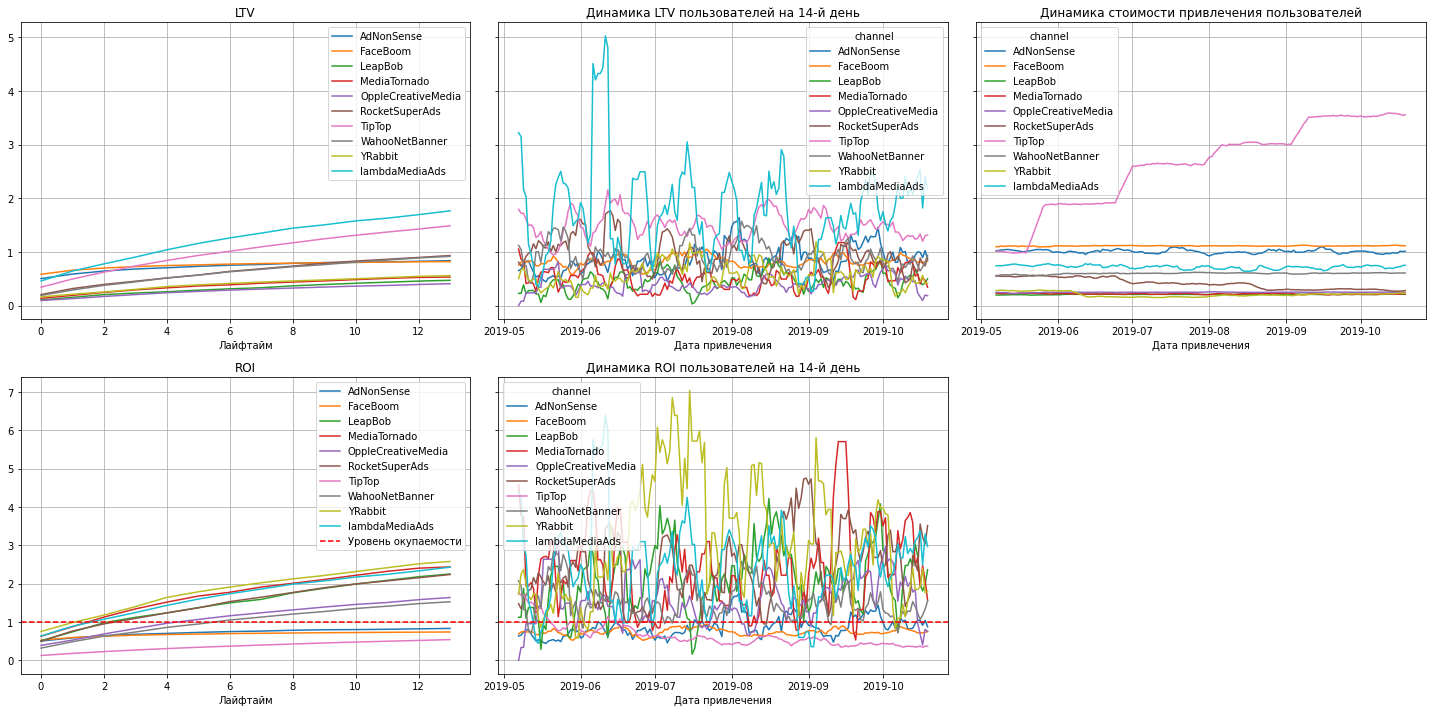

In [68]:
#строим графики
plot_ltv_roi(ltv_channel, ltv_history_channel, roi_channel, roi_history_channel, horizon_days, window=7)

По всем каналам привлечения показатель LTV подвержен сезонности, но стабилен. Явным лидером является lambdaMediaAds, имеющая довольно средние показатели по стоимости привлечения пользователей. Самые высокая стоимость привлечения пользователей по каналу TipTop, которая не оправдывает себя. Несмотря на стабильные траты на рекламу в FaceBoom, они тоже не оправдывают себя. Также не оправдываются расходы через канал AdNonSense. Остальные каналы оправдали себя, самый высокий показатель окупаемости, в том числе в динамике, у YRabbit. Стоимость привлечения пользователей на этих каналах также значительно не меняется в динамике.

In [69]:
#сырые данные, таблица конверсии, таблица динамики конверсии в зависимости от устройства
conversion_raw_device, conversion_device, conversion_history_device = get_conversion(
                                                                profiles_without_org,
                                                                orders,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['device'],
                                                                ignore_horizon=False,
                                                                )

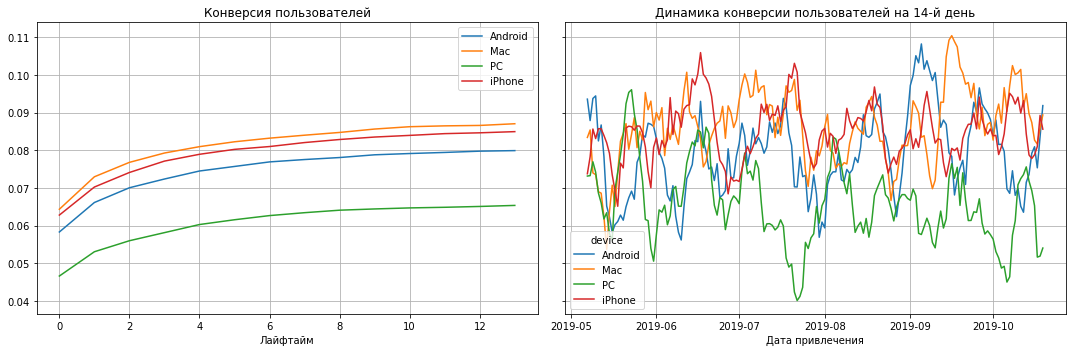

In [70]:
#графики конверсии и динамики конверсии
plot_conversion(conversion_device, conversion_history_device , horizon_days, window=7)

Несмотря на то, что пользователи iPhone не окупаются, конверсия у них одна их самых высоких. Посмотрим тогда на удержание этих пользователей.

In [71]:
#сырые данные, таблица удержания, таблица динамики удержания в зависимости от устройства
retention_raw_device, retention_device, retention_history_device = get_retention(
                                                            profiles_without_org,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['device'],
                                                            ignore_horizon=False,
                                                            )

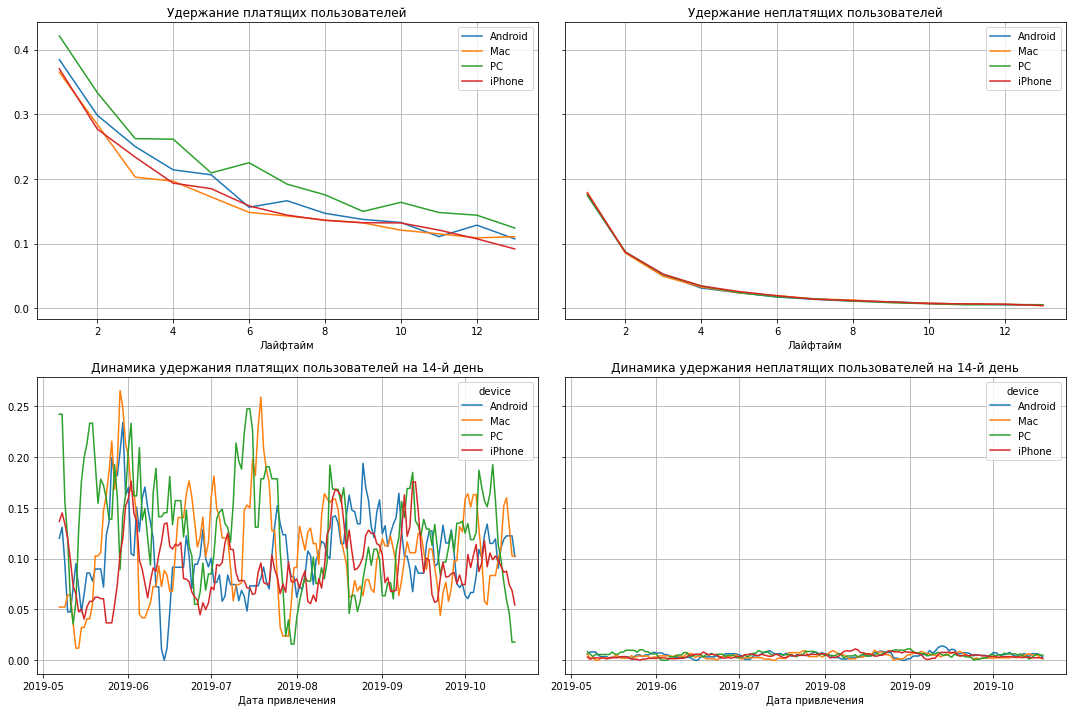

In [72]:
#графики удержания и динамики удержания
plot_retention(retention_device, retention_history_device, horizon_days, window=7)

Удержание платящих пользователей iPhone низкое относительно Android и PC, но не на столько, чтобы это было какой-то особенностью. Самый высокий показатель удержания у пользователей PC.

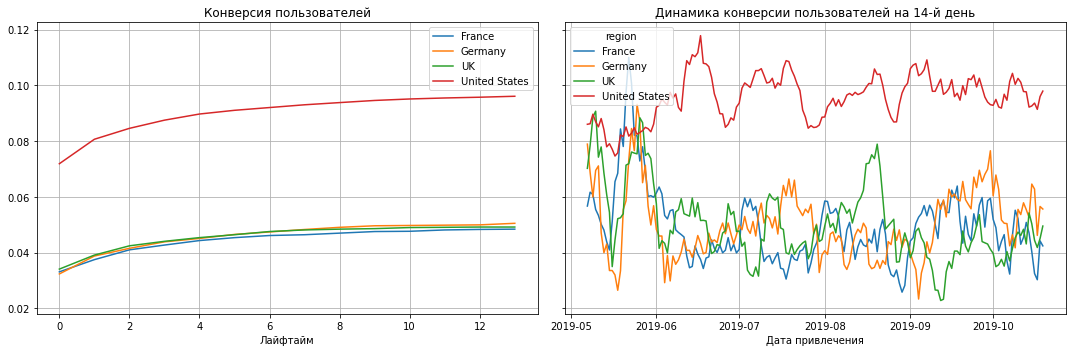

In [73]:
#сырые данные, таблица конверсии, таблица динамики конверсии в зависимости от региона
conversion_raw_region, conversion_region, conversion_history_region = get_conversion(
                                                                profiles_without_org,
                                                                orders,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['region'],
                                                                ignore_horizon=False,
                                                                )

#графики конверсии и динамики конверсии
plot_conversion(conversion_region, conversion_history_region, horizon_days, window=7)

Конверсия пользователей из США значительно превышает конверсию пользователей других регионов. В динамике конверсии также лидируют США, причем наблюдается значительный рост в июне, в отличие от других регионов.

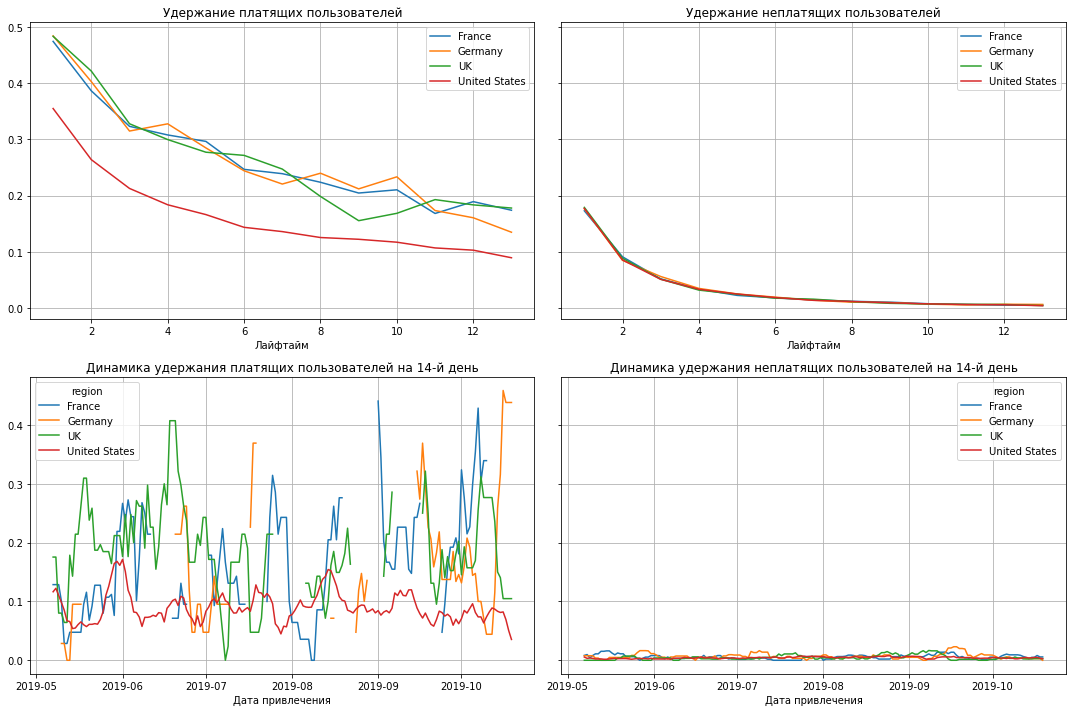

In [74]:
#сырые данные, таблица удержания, таблица динамики удержания в зависимости от устройства
retention_raw_region, retention_region, retention_history_region = get_retention(
                                                            profiles_without_org,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['region'],
                                                            ignore_horizon=False,
                                                            )

#графики удержания и динамики удержания
plot_retention(retention_region, retention_history_region, horizon_days, window=7)

А вот удержание платящих пользователей из США самое низкое и довольно значительно отличаются от удержания пользователей других регионов.

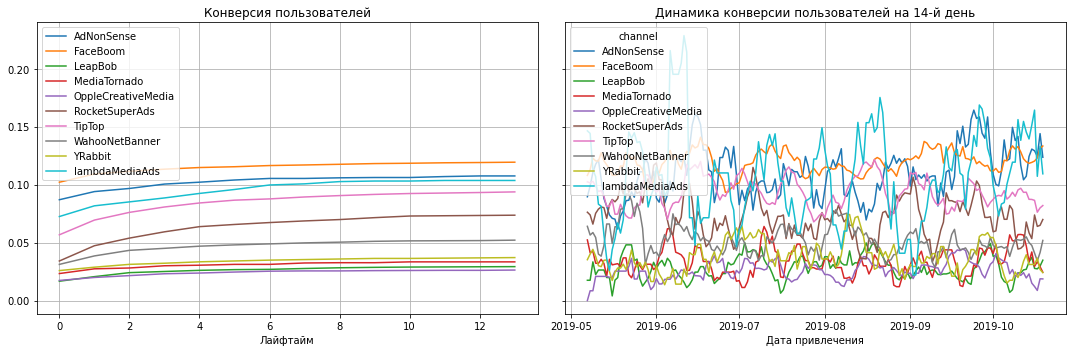

In [75]:
#сырые данные, таблица конверсии, таблица динамики конверсии в зависимости от региона
conversion_raw_channel, conversion_channel, conversion_history_channel = get_conversion(
                                                                profiles_without_org,
                                                                orders,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['channel'],
                                                                ignore_horizon=False,
                                                                )

#графики конверсии и динамики конверсии
plot_conversion(conversion_channel, conversion_history_channel, horizon_days, window=7)

Самая высокая конверсия у пользователей, полученных через FaceBoom, самая низкая - у OppleCreativeMedia.

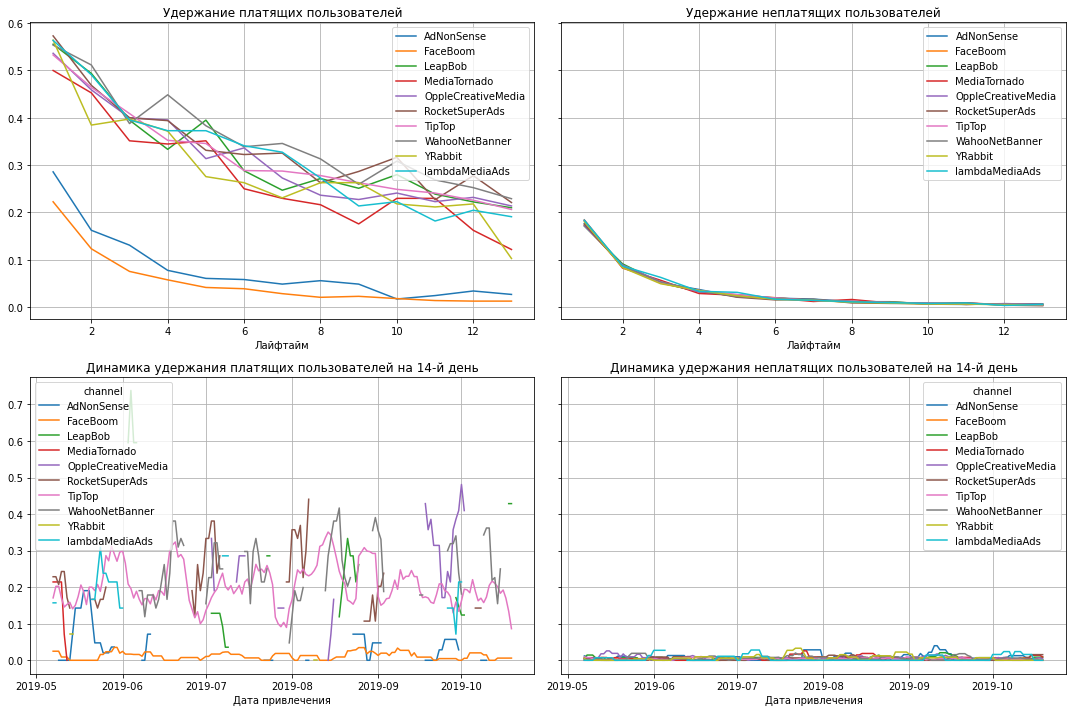

In [76]:
#сырые данные, таблица удержания, таблица динамики удержания в зависимости от устройства
retention_raw_channel, retention_channel, retention_history_channel = get_retention(
                                                            profiles_without_org,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['channel'],
                                                            ignore_horizon=False,
                                                            )

#графики удержания и динамики удержания
plot_retention(retention_channel, retention_history_channel, horizon_days, window=7)

А вот динамика удержания у FaceBoom - самая низкая, вместе с каналом AdNonSense они значительно отличаются по удержанию пользователей от остальных каналов.

In [77]:
#делаем отдельные срезы пользователей из США и Европы
profiles_na = profiles.query('region == "United States" & channel != "organic"')
profiles_eu = profiles.query('region != "United States" & channel != "organic"')

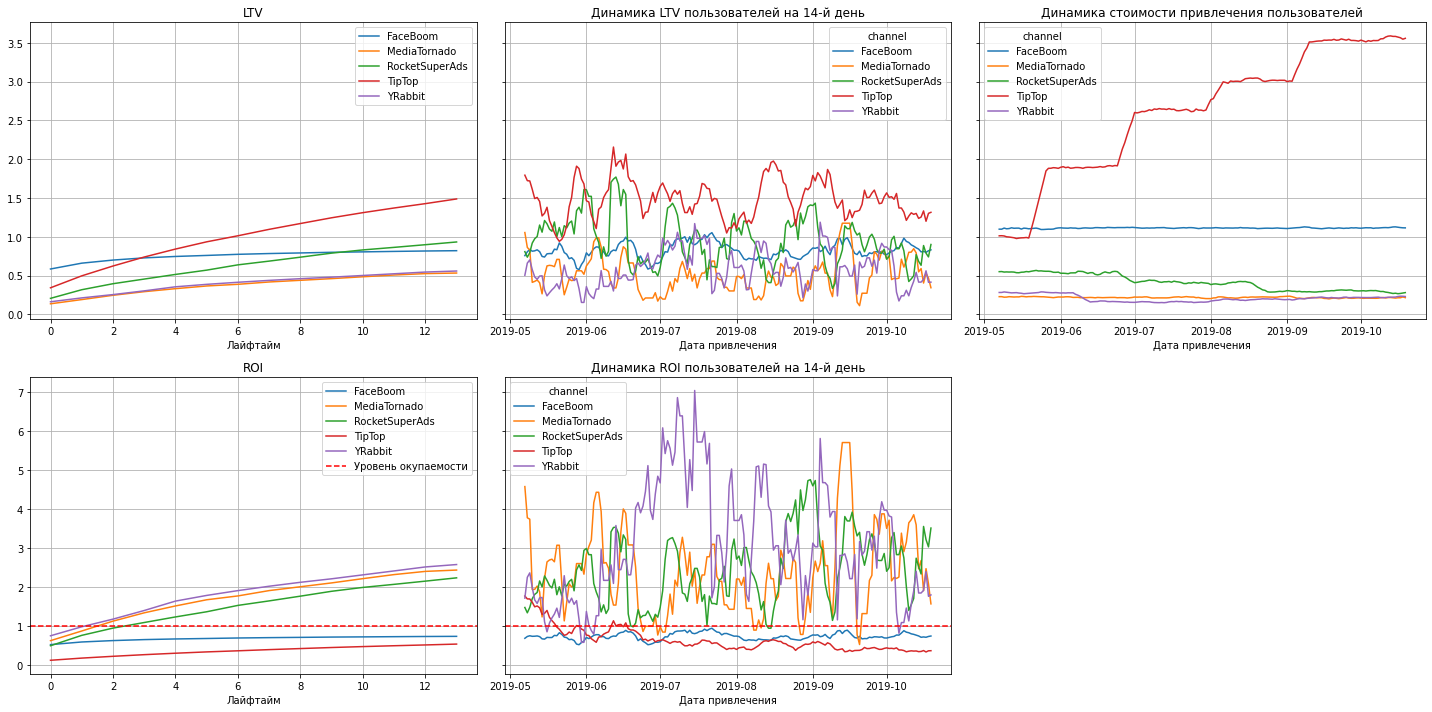

In [78]:
# сырые данные, таблица LTV, таблица динамики LTV, таблица ROI, таблица динамики ROI для США в разбивке по каналам

usa_raw, ltv_channel_na, ltv_history_channel_na, roi_channel_na, roi_history_channel_na = get_ltv(
                                                                                profiles_na,
                                                                                orders,
                                                                                observation_date,
                                                                                horizon_days,
                                                                                dimensions=['channel'],
                                                                                ignore_horizon=False,
                                                                                )

#строим графики
plot_ltv_roi(ltv_channel_na, ltv_history_channel_na, roi_channel_na, roi_history_channel_na, horizon_days, window=7)

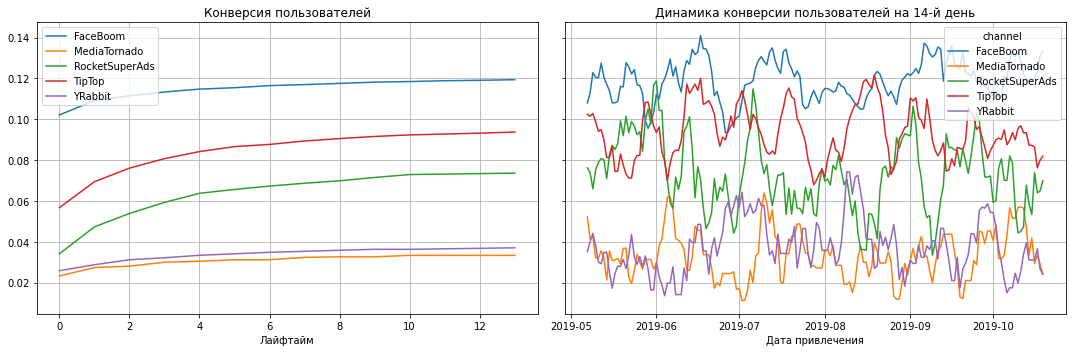

In [79]:
#сырые данные, таблица конверсии, таблица динамики конверсии в зависимости от канала в США
conversion_raw_channel_na, conversion_channel_na, conversion_history_channel_na = get_conversion(
                                                                profiles_na,
                                                                orders,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['channel'],
                                                                ignore_horizon=False,
                                                                )

#графики конверсии и динамики конверсии
plot_conversion(conversion_channel_na, conversion_history_channel_na, horizon_days, window=7)

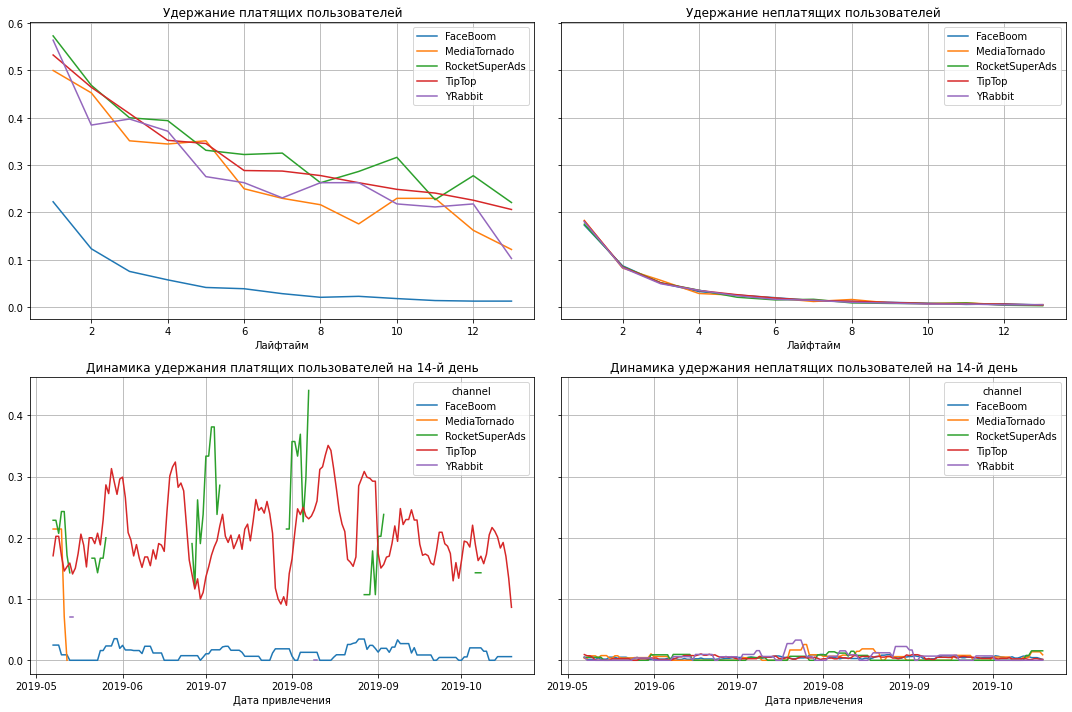

In [80]:
#сырые данные, таблица удержания, таблица динамики удержания в зависимости от канала в США
retention_raw_channel_na, retention_channel_na, retention_history_channel_na = get_retention(
                                                            profiles_na,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['channel'],
                                                            ignore_horizon=False,
                                                            )

#графики удержания и динамики удержания
plot_retention(retention_channel_na, retention_history_channel_na, horizon_days, window=7)

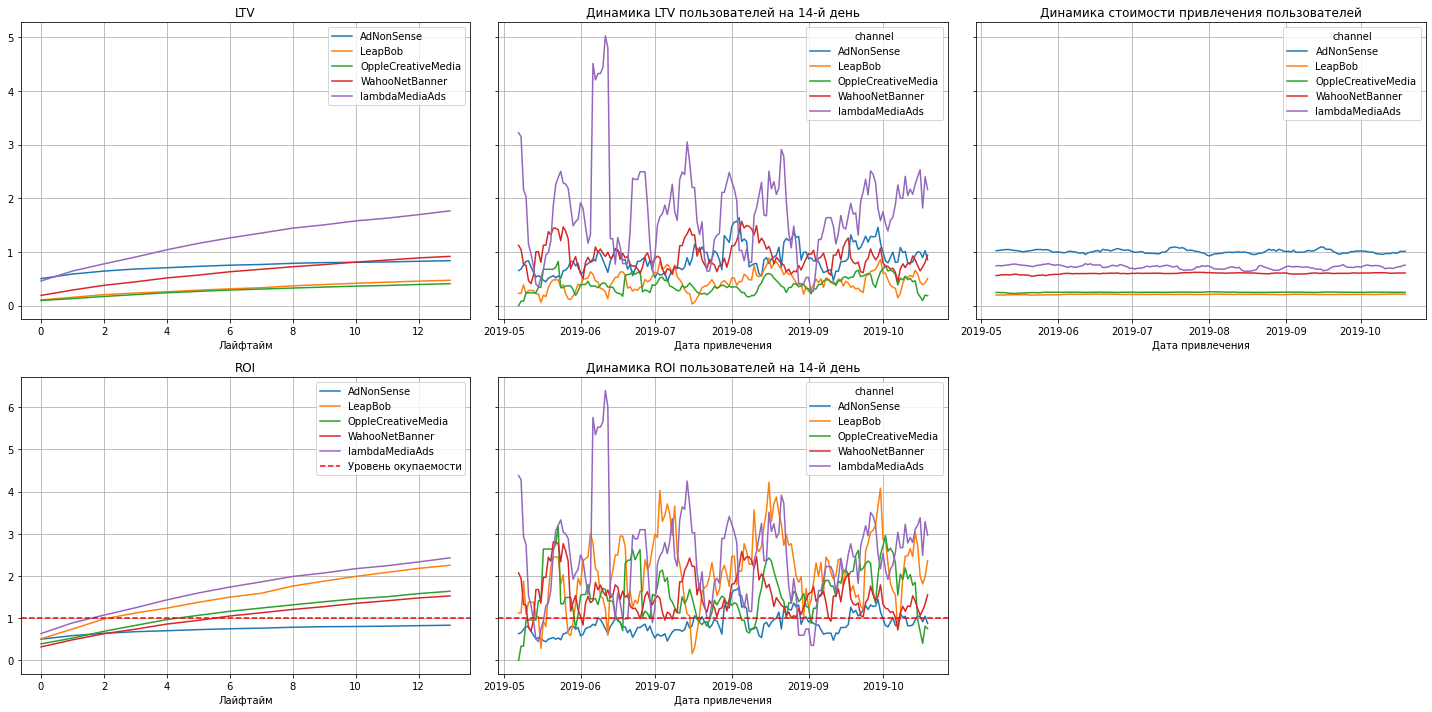

In [81]:
# сырые данные, таблица LTV, таблица динамики LTV, таблица ROI, таблица динамики ROI для Европы в разбивке по каналам

usa_raw, ltv_channel_eu, ltv_history_channel_eu, roi_channel_eu, roi_history_channel_eu = get_ltv(
                                                                                profiles_eu,
                                                                                orders,
                                                                                observation_date,
                                                                                horizon_days,
                                                                                dimensions=['channel'],
                                                                                ignore_horizon=False,
                                                                                )

#строим графики
plot_ltv_roi(ltv_channel_eu, ltv_history_channel_eu, roi_channel_eu, roi_history_channel_eu, horizon_days, window=7)

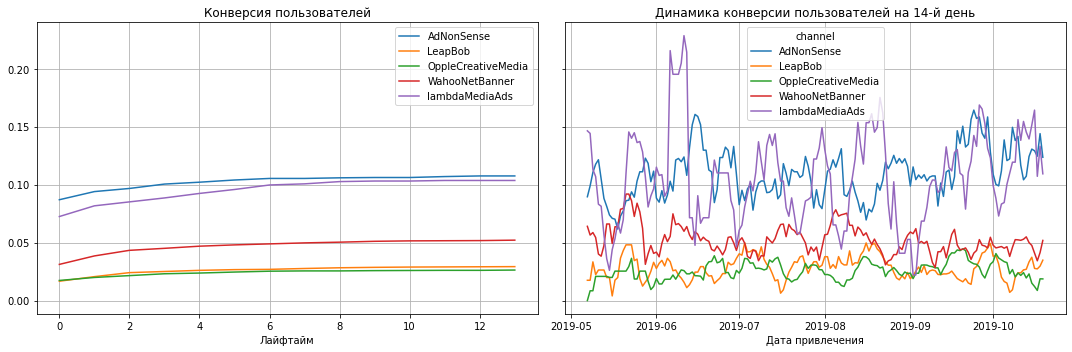

In [82]:
#сырые данные, таблица конверсии, таблица динамики конверсии в зависимости от канала в Европе
conversion_raw_channel_eu, conversion_channel_eu, conversion_history_channel_eu = get_conversion(
                                                                profiles_eu,
                                                                orders,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['channel'],
                                                                ignore_horizon=False,
                                                                )

#графики конверсии и динамики конверсии
plot_conversion(conversion_channel_eu, conversion_history_channel_eu, horizon_days, window=7)

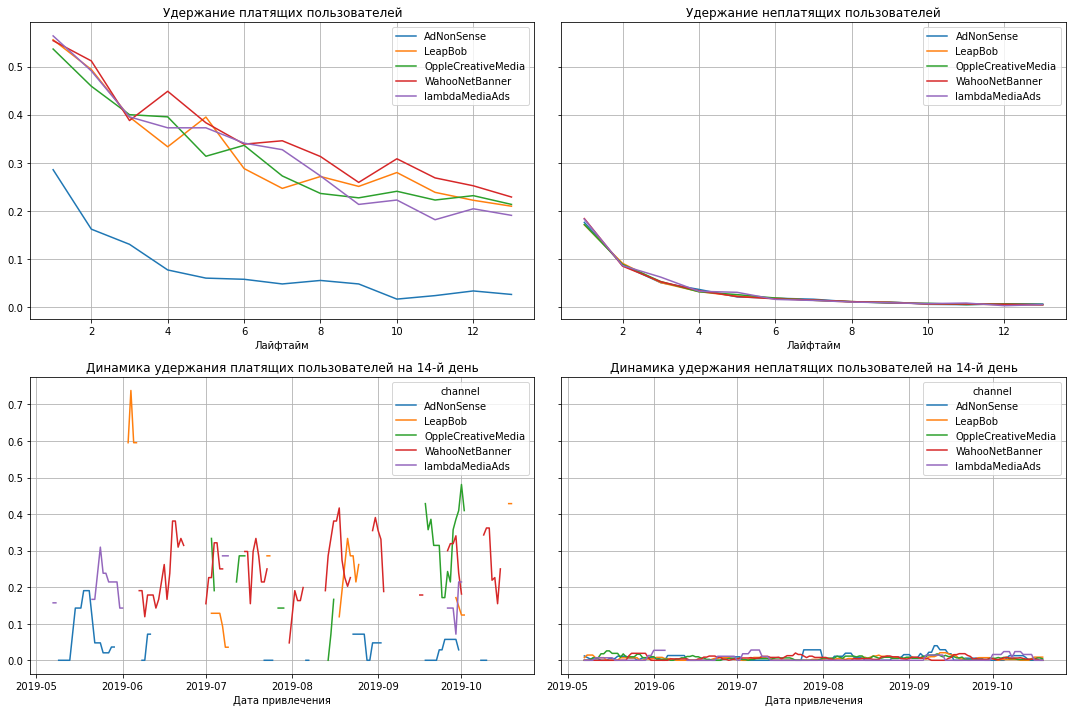

In [83]:
#сырые данные, таблица удержания, таблица динамики удержания в зависимости от канала в Европе
retention_raw_channel_eu, retention_channel_eu, retention_history_channel_eu = get_retention(
                                                            profiles_eu,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['channel'],
                                                            ignore_horizon=False,
                                                            )

#графики удержания и динамики удержания
plot_retention(retention_channel_eu, retention_history_channel_eu, horizon_days, window=7)

Лидером по LTV у пользователей из США является канал TipTop, он же лидирует и в динамике по стоимости привлечения пользователей, причем, расходы с каждым месяцем все время значительно увеличиваются, однако, это не приносит прибыли - ROI не окупается. Второй по затратам на привлечение пользователей канал FaceBoom также не окупается. А вот каналы, расходы на привлечение пользователей через которые в динамике уменьшались, наоборот стабильно окупаются.

Несмотря на самую высокую конверсию среди всех каналов, канал FaceBoom является аутсайдером по удержанию платящих пользователей, причем отставание от других каналов значительное.

В Европе расходы на привлечение новых пользователей значительно не отличаются в динамике, лидером является канал AdNonSense, но вместе с этим он единственный не окупается. Конверсия европейских пользователей по каналам AdNonSense и lambdaMediaAds практически одинаковая, при этом удержание платящих пользователей по каналу AdNonSense самое низкое и значительно отличается от других каналов.

В целом, реклама, направленная на привлечение пользователей не окупается. Расходы на рекламные компание со временем увеличивались, но окупаемость только снижалась.

США являются лидером по количеству платящих пользователей, и несмотря на самую высокую конверсию среди регионов и самые высокие расходы на рекламу, именно в США реклама не окупается, удержание этих пользователей также сильно отличается от пользователей других регионов. Несмотря на самые высокие вложения в привлеченияе пользователей с устройствами на iPhone и Mac, а также рост расходов на рекламу среди этих пользователей, реклама не окупается - ROI этих пользователей так и не достигает уровеня окупаемости, в отличие от пользователей на Android и PC. Самая высокая стоимость привлечения пользователей - по каналу TipTop, которая не оправдывает себя. Несмотря на одинаковые траты на рекламу в FaceBoom, они тоже не оправдывают себя. Также не оправдываются расходы через канал AdNonSense. Стоит отметить, что реклама через те каналы, где сумма расходов была не высокой и не росла с течением времени, окупилась. 

Проблемы возникают с удержанием платящих пользователей из США, возможно, был выбран неправильно канал для размещения рекламы или, возможно, само приложение не вызывает долгосрочный интерес у пользователей этого региона. Учитывая окупаемость рекламных компаний через каналы, на которые не увеличивали расходы, проблема может быть вызвана нецелесообразным расходованием средств на рекламные компании.

### Вывод


Для анализа было предоставлена три набора данных. Была проведена предварительная обработка данных: во всех наборах данных нет пропущенных значений и явных и неявных дубликатов; названия столбцов приведены к змеиному регистру, тип данных столбцов с датой приведены к соотвествующему типу данных.

Больше всего пользователей приложения, а также и доля платящих внутри региона из США - почти 7%. Несмотря на то, что пользователей из Германии меньше всего по доле платящих внутри региона они находятся на втором месте. Если смотреть доли относоительного общего числа платящих пользователей здесь также лидируют США, причем со значительным отрывом, 77.7% от общего числа платящих - это пользователи США, пользователи остальных регионов распределились примерно одинаково.

Большинство пользователей предпочитают пользоваться iPhone, однако, наибольшая доля платящих среди пользователей Mac, хотя  количество пользователей этого устройства наименьшее. Наименьшая доля платящих среди пользователей PC. Относительно общего количества всех платящих пользователей, 38.1 пользователей iPhone, меньше всего - 17.3% приходится на PC. Это соответствует и информаци о регионе платящих пользователей, так как в США лидируют iPhone и Mac.

Большинство пользователей пришло напрямую в приложение, однако, доля платящих среди них наименьшая - 2%. Но для бесплатных в плане привлечения пользователей, это даже очень хорошо. Наибольшая доля платящих клиентов среди пользователей, пришедших через канал FaceBoom - более 12%. Относительно общего количества всех платящих пользователей, 40.1 пользователей FaceBoom, меньше всего - MediaTornado.


Общая сумма расходов на маркетинг составила 105497. Наибольшую сумму потратили на рекламу через канал TipTop, на втором месте - FaceBoom, наименьшие расходы на рекламу через канал YRabbit. Недельные расходы на источники привлечения на каналы TipTop и FaceBoom значительно выше расходов на остальные каналы, с переменной динамикой роста, относительно первой рассматриваемой недели расходы увеличись с 400 и 500 до 1500 и 3200 соответственно. Расходы другие каналы варьируют в пределах 300 на всем рассматриваемом периоде. Начиная с 23 недели, наименьшие расходы у YRabbit и MEdiaTornado.

Динамика расходов во времени по месяцам похожая: лидерами являются TipTop и FaceBoom, расходы на которых начались от 3000 в мае и в октябре они достигили 12000 и 6000 соответственно.Расходы на другие каналы варьируют в пределах 1200 на всем рассматриваемом периоде. Наименьшие расходы у YRabbit и MEdiaTornado в октябре не превышают 200.

Учитывая значительные расходы на рекламу через каналы TipTop и FaceBoom, неудивительно видеть у этих каналов и самые высокие суммы для привлечения одного пользователя, 2.79 и 1.11 соответственно. Без учеты бесплатных пользователей, наименьшие показатели YRabbit, MediaTornado, LeapBob.


В целом, реклама, направленная на привлечение пользователей не окупается. Расходы на рекламные компание со временем увеличивались, но окупаемость только снижалась.

США являются лидером по количеству платящих пользователей, и несмотря на самую высокую конверсию среди регионов и самые высокие расходы на рекламу, именно в США реклама не окупается, удержание этих пользователей также сильно отличается от пользователей других регионов. Несмотря на самые высокие вложения в привлечение пользователей с устройствами на iPhone и Mac, а также рост расходов на рекламу среди этих пользователей, реклама не окупается - ROI этих пользователей так и не достигает уровень окупаемости, в отличие от пользователей на Android и PC. Самые высокая стоимость привлечения пользователей по каналу TipTop, которая не оправдывает себя. Несмотря на стабильные траты на рекламу в FaceBoom, они тоже не оправдывают себя. Также не оправдываются расходы через канал AdNonSense.

Проблемы возникают с удержанием платящих пользователей из США, возможно, был выбран неправильно канал для размещения рекламы или на этот канал зря чрезмерно увеличивали бюджет, или, возможно, само приложение не вызывает долгосрочный интерес у пользователей этого региона. Отделу маркетинга можно рекомендовать пересмотреть распределение средств по каналам привлечения. Например, исключить неокупающиеся каналы TipTop и FaceBoom, или значительно уменьшить расходы на них. 

С учетом разбивки пользователей по регионам, можно рекомендовать компании в США исключить неокупающиеся каналы TipTop и FaceBoom, а в Европе AdNonSense и обратить внимание на другие каналы, например, YRabbit в США и lambdaMediaAds в Европе.